# Literature Search Crawl Report

Generate various stats validations from the artifacts of the literature search

In [17]:
import os
import re
import requests
import json
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
    
os.chdir(os.path.expanduser("~/data/pubmunch/crawl/"))

## Download

In [6]:
with open("download/pmids.txt") as f:
    pmids = set(f.read().splitlines())
print("{} PMIDs attempted".format(len(pmids)))

15 PMIDs attempted


In [7]:
download = pd.read_csv("download/docStatus.tab",
                       sep="\t", header=None, index_col=False, dtype=str,
                       names=["pmid", "status", "msg", "crawler", "journal", "year", "numFiles", "detail"])

print("{} ({}%) succeeded\n {} ({}%) failed\n".format(
    download[download.status == "OK"].shape[0], 
    round(100 * download[download.status == "OK"].shape[0] / len(pmids)),
    download[download.status != "OK"].shape[0], 
    round(100 * download[download.status != "OK"].shape[0] / len(pmids))))
print(download.status.value_counts())

15 (100%) succeeded
 0 (0%) failed

OK    15
Name: status, dtype: int64


## Find

In [8]:
with open("literature.json") as f:
    lit = json.loads(f.read())
print("{} Papers and {} Variants exported".format(len(lit["papers"]), len(lit["variants"])))

14 Papers and 4587 Variants exported


In [13]:
print("Papers that didn't yield any variants:")
set(pmids) - set(lit["papers"].keys())

Papers that didn't yield any variants:


{'28122244'}

In [32]:
lit["variants"]["chr17:g.43124027:ACT>A"]

{'11352856': ['previous history of breast or ovarian cancer. All subjects were genotyped for the three mutations that are relatively common in Ashkenazi Jews, namely<<< 185delAG>>> and 5382 insC in BRCA1 and 6174delT in BRCA2.',
  'ecific relative risks of breast cancer attributable to one of the three mutations that are relatively common in the Ashkenazi Jewish population, i.e.,<<< 185delAG>>> and 5382 insC in BRCA1, and 6174delT in BRCA2.',
  'series, and individuals referred for prenatal carrier testing as controls, leading to a lifetime penetrance estimate of 36% for a combined analysis of<<< 185delAG>>> and 6174delT carriers.',
  'All subjects were genotyped for the three mutations that are relatively common in Ashkenazi Jews, namely<<< 185delAG>>> and 5382 insC in BRCA1 and 6174delT in BRCA2.'],
 '12473589': ['The cases and controls were genotyped for three Ashkenazi Jewish founder mutations, namely<<< 185delAG>>> and 5382insC in BRCA1 and 6174delT in BRCA2.',
  'Inherited mutati

In [ ]:
print("Max mentions for a single variant: {} {}".format(
    exploded.groupby(["pyhgvs_Genomic_Coordinate_38"]).size().idxmax(),
    exploded.groupby(["pyhgvs_Genomic_Coordinate_38"]).size().max()))

print("Max mentions for a single paper from one variant: {} {}".format(
    exploded.groupby(["pyhgvs_Genomic_Coordinate_38", "pmid"]).size().idxmax(),
    exploded.groupby(["pyhgvs_Genomic_Coordinate_38", "pmid"]).size().max()))

print("Paper referenced from the most variants: {} {}".format(
    exploded.groupby(["pmid"]).size().idxmax(),
    exploded.groupby(["pmid"]).size().max()))

## Founder Mutations

In [23]:
# BRCA1 185delAG: https://brcaexchange.org/variant/183889
# chr17:g.43124027:ACT>A
text = """
Abeliovich et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/9042909 (in article title)
Antoniou et al. 2005 à https://www.ncbi.nlm.nih.gov/pubmed/15994883 (in article title)
Chodick et al. 2008 à https://www.ncbi.nlm.nih.gov/pubmed/18158280 (in article abstract)
Elstrodt et al. 2006 à https://www.ncbi.nlm.nih.gov/pubmed/16397213 (in article abstract)
Finkelman et al. 2012 à https://www.ncbi.nlm.nih.gov/pubmed/22430266 (in article abstract)
Gabai-Kapara et al. 2014 à https://www.ncbi.nlm.nih.gov/pubmed/25192939 (in article introduction and methods)
King et al. 2003 à https://www.ncbi.nlm.nih.gov/pubmed/14576434 (in article)
Konishi et al. 2011 à https://www.ncbi.nlm.nih.gov/pubmed/21987798 (in abstract)
Linger and Kruk 2010 à https://www.ncbi.nlm.nih.gov/pubmed/20608970 (in article)
Satagopan et al. 2001 à https://www.ncbi.nlm.nih.gov/pubmed/11352856 (in abstract)
Satagopan et al. 2002 à https://www.ncbi.nlm.nih.gov/pubmed/12473589 (in abstract)
Stadler et al. 2012 à https://www.ncbi.nlm.nih.gov/pubmed/21598239 (in abstract)
Struewing et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/9145676 (in abstract)

Struewing et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/111111 Spikein :-)
"""
print(set(re.findall(r"\/(\d+)", text)).difference(set(lit["variants"]["chr17:g.43124027:ACT>A"].keys())))

# **BRCA1 5382insC: https://brcaexchange.org/variant/180141**
# chr17:g.43057062:T>TG
text = """
Abeliovich et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/9042909 (in article title)
Antoniou et al. 2005 à https://www.ncbi.nlm.nih.gov/pubmed/15994883 (in article title)
Finkelman et al. 2012 à https://www.ncbi.nlm.nih.gov/pubmed/22430266 (in article)
Gabai-Kapara et al. 2014 à https://www.ncbi.nlm.nih.gov/pubmed/25192939 (in article introduction and methods)
King et al. 2003 à https://www.ncbi.nlm.nih.gov/pubmed/14576434 (in article)
Mgbemena et al. 2017 à https://www.ncbi.nlm.nih.gov/pubmed/28122244 (in abstract)
Satagopan et al. 2002 à https://www.ncbi.nlm.nih.gov/pubmed/12473589 (in abstract)
Struewing et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/9145676 (in abstract)

Struewing et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/111111 Spikein :-)
"""
print(set(re.findall(r"\/(\d+)", text)).difference(set(lit["variants"]["chr17:g.43057062:T>TG"].keys())))

# **BRCA2 6174delT: https://brcaexchange.org/variant/177049**
# chr13:g.32340526:AT>A
text = """
Abeliovich et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/9042909 (in article title)
Antoniou et al. 2005 à https://www.ncbi.nlm.nih.gov/pubmed/15994883 (in article title)
Chodick et al. 2008 à https://www.ncbi.nlm.nih.gov/pubmed/18158280 (in article abstract)
Finkelman et al. 2012 à https://www.ncbi.nlm.nih.gov/pubmed/22430266 (in article abstract)
Gabai-Kapara et al. 2014 à https://www.ncbi.nlm.nih.gov/pubmed/25192939 (in article introduction and methods)
Gallagher et al. 2010 à https://www.ncbi.nlm.nih.gov/pubmed/20215531 (in methods)
King et al. 2003 à https://www.ncbi.nlm.nih.gov/pubmed/14576434 (in article)
Satagopan et al. 2001 à https://www.ncbi.nlm.nih.gov/pubmed/11352856 (in abstract)
Satagopan et al. 2002 à https://www.ncbi.nlm.nih.gov/pubmed/12473589 (in abstract)
Struewing et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/9145676 (in abstract)

Struewing et al. 1997 à https://www.ncbi.nlm.nih.gov/pubmed/111111 Spikein :-)
"""
print(set(re.findall(r"\/(\d+)", text)).difference(set(lit["variants"]["chr13:g.32340526:AT>A"].keys())))

{'111111'}
{'111111', '28122244'}
{'111111'}


## LOVD

In [24]:
lovd = pd.read_table(
    "https://raw.githubusercontent.com/BRCAChallenge/pubMunch-BRCA/master/tests/lovd-normalized.tsv", dtype=str)
print("{} pmids and {} variants in normalized LOVD truth set".format(
    len(set(lovd.pmid.values)),
    len(set(lovd.pyhgvs_Genomic_Coordinate_38.values))))
lovd.head()

175 pmids and 1044 variants in normalized LOVD truth set


,pmid,norm_c_hgvs,norm_g_hgvs,pyhgvs_Genomic_Coordinate_38
0,24667779,NM_007294.3:c.-19-22_-19-21dup,NC_000017.11:g.43124146_43124147dup,chr17:g.43124146_43124147:dup
1,10459348,NM_007294.3:c.-19-10T>C,NC_000017.11:g.43124125A>G,chr17:g.43124125:A>G
2,24667779,NM_007294.3:c.-19-10T>C,NC_000017.11:g.43124125A>G,chr17:g.43124125:A>G
3,16403807,NM_007294.3:c.-3G>C,NC_000017.11:g.43124099C>G,chr17:g.43124099:C>G
4,19393826,NM_007294.3:c.1_134del,NC_000017.11:g.43115728_43124098del,chr17:g.43115728_43124098:del


In [25]:
print("Missing from list of PMIDs to download:")
print(", ".join([p for p in set(lovd.pmid.values) if p not in pmids]))

print("\nFailed to download:")
print(", ".join(["{} ({})".format(p, download[download.pmid == p].status.values[0]) 
                   for p in set(lovd.pmid.values) if 
                   download[(download.pmid == p) & (download.status != "OK")].shape[0]]))

Missing from list of PMIDs to download:
11526114, 17005433, 15353005, 17902052, 22144684, 17308087, 12606139, 16760288, 18493658, 09805131, 18712473, 11504767, 17924331, 18693280, 12037674, 15133502, 12354784, 18824701, 15726418, 15235020, 15345110, 18992264, 22962691, 10551859, 16014699, 15001988, 15743496, 18391021, 12442171, 18375895, 12427738, 20507642, 14729053, 21719596, 17305420, 12400015, 15350310, 18451181, 09126734, 11389159, 10951344, 12759930, 11573086, 19493677, 16619214, 19892845, 20967475, 15290653, 15317758, 15533909, 10373534, 15695382, 20513136, 19287957, 11157798, 15125843, 07545954, 11877378, 07939630, 11239456, 15609993, 16267036, 20103620, 14976165, 16101277, 10459348, 11320250, 08896551, 11137998, 20215541, 16168123, 18285836, 22678057, 19043619, 09333265, 08531967, 11185744, 17657584, 12145750, 24667779, 08942979, 20020529, 10811118, 12552570, 15829246, 20875879, 18415037, 16403807, 16528612, 17063491, 19452558, 10506595, 10479726, 19267246, 12457999, 14534301, 

In [26]:
lit_pmids = set([pmid for variant, mentions in lit["variants"].items() for pmid in mentions.keys()])

common_pmids = list(lit_pmids.intersection(set(lovd.pmid.values)))
print("{} common pmids between LOVD and this crawl".format(len(common_pmids)))

0 common pmids between LOVD and this crawl


In [27]:
# Invert the literature.json exported to BRCA Exchange to create a variants by pmid from literature
import itertools

lit_pmid_variant_tuple = [(pmid, variant) 
                          for variant, mention in lit["variants"].items() 
                          for pmid in list(mention.keys())]

lit_variants_by_pmid = {pmid: [v[1] 
                        for v in variants]
                        for pmid, variants in itertools.groupby(sorted(lit_pmid_variant_tuple), lambda x: x[0])}

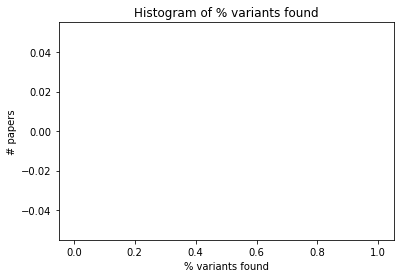

In [28]:
# Compute per paper the % of LOVD variants we found and exported in literature.json
pcts = {
    p: len(set(lit_variants_by_pmid[p]).intersection(
        set(lovd[lovd.pmid == p].pyhgvs_Genomic_Coordinate_38.values))) / len(
        set(lovd[lovd.pmid == p].pyhgvs_Genomic_Coordinate_38.values)) 
    for p in common_pmids}

lovd_stats = pd.DataFrame.from_dict(pcts, orient="index", columns=["pct"]).rename_axis("pmid")

plt.hist(lovd_stats.pct)
plt.title("Histogram of % variants found")
plt.xlabel("% variants found")
plt.ylabel("# papers")
plt.show()

In [12]:
print("PMIDs with < 50% of the variants in LOVD found:")
print(", ".join([v for v in lovd_stats[lovd_stats.pct < 0.5].index.values]))

PMIDs with < 50% of the variants in LOVD found:
17924331, 10638982, 11185744, 21673748, 17899372, 24667779, 15353005, 11573086, 18424508, 18694767, 18824701, 14513821, 22144684, 16280041, 19043619, 12759930, 12442171, 14729053, 24395671, 21741379, 15001988, 12142080, 19423647, 15876480, 18712473
